In [1]:
!git clone https://github.com/nack424/Image-Inpainting-for-Anime-Digital-Painting

Cloning into 'Image-Inpainting-for-Anime-Digital-Painting'...
remote: Enumerating objects: 511, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 511 (delta 61), reused 11 (delta 5), pack-reused 401
Receiving objects: 100% (511/511), 7.82 MiB | 14.94 MiB/s, done.
Resolving deltas: 100% (324/324), done.


### Preparations

Install python environments

In [2]:
!pip install opencv-python
!pip install torch torchvision torchaudio
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=ccf4a1f9e315a2b8cdcdde8067f83d0511264b61013aeb4df08cad0b8b208be6
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


Login WandB

In [3]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create folder for store models

In [8]:
!mkdir ./Image-Inpainting-for-Anime-Digital-Painting/models
!mkdir ./Image-Inpainting-for-Anime-Digital-Painting/models/save_pretrain
!mkdir ./Image-Inpainting-for-Anime-Digital-Painting/models/load_pretrain
!mkdir ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_small
!mkdir ./Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_small
!mkdir ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_large
!mkdir ./Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_large

### Pretrain each model

Coarse model

In [9]:
!python ./Image-Inpainting-for-Anime-Digital-Painting/pretrain.py --model='coarse' --batch_size=1 --epochs=100 --train_path='./Image-Inpainting-for-Anime-Digital-Painting/trainset' --save_model='./Image-Inpainting-for-Anime-Digital-Painting/models/save_pretrain'

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100% 548M/548M [00:05<00:00, 105MB/s] 
wandb: Currently logged in as: nakere424. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230910_173059-6mt35uhc
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run true-frost-107
wandb: ⭐️ View project at https://wandb.ai/nakere424/anime_inpaint_coarse
wandb: 🚀 View run at https://wandb.ai/nakere424/anime_inpaint_coarse/runs/6mt35uhc
[W reducer.cpp:1300] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Not

Super Resolution model

In [10]:
!python ./Image-Inpainting-for-Anime-Digital-Painting/pretrain.py --model='super_resolution' --batch_size=1 --epochs=100 --train_path='./Image-Inpainting-for-Anime-Digital-Painting/trainset' --save_model='./Image-Inpainting-for-Anime-Digital-Painting/models/save_pretrain'

wandb: Currently logged in as: nakere424. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230910_173121-14kwn597
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run vocal-feather-29
wandb: ⭐️ View project at https://wandb.ai/nakere424/anime_inpaint_super_resolution
wandb: 🚀 View run at https://wandb.ai/nakere424/anime_inpaint_super_resolution/runs/14kwn597
[W reducer.cpp:1300] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to have unused parameters. (function operato

Refinement model

In [11]:
!python ./Image-Inpainting-for-Anime-Digital-Painting/pretrain.py --model='refinement' --batch_size=1 --epochs=100 --train_path='./Image-Inpainting-for-Anime-Digital-Painting/trainset' --save_model='./Image-Inpainting-for-Anime-Digital-Painting/models/save_pretrain'

wandb: Currently logged in as: nakere424. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230910_173140-g2hwoowt
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run toasty-violet-73
wandb: ⭐️ View project at https://wandb.ai/nakere424/anime_inpaint_refinement
wandb: 🚀 View run at https://wandb.ai/nakere424/anime_inpaint_refinement/runs/g2hwoowt
[W reducer.cpp:1300] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to have unused parameters. (function operator())
/usr/lo

### Combinded train

Move pretrain models

In [12]:
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_pretrain/coarse100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_pretrain/coarse100.pt
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_pretrain/super_resolution100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_pretrain/super_resolution100.pt
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_pretrain/refinement100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_pretrain/refinement100.pt

Combined train model with small mask

In [13]:
!python ./Image-Inpainting-for-Anime-Digital-Painting/train.py --batch_size=1 --epochs=100  --mask_type=1 --train_path='./Image-Inpainting-for-Anime-Digital-Painting/trainset' --val_path='./Image-Inpainting-for-Anime-Digital-Painting/valset' --save_model='./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_small' --load_inpaint='./Image-Inpainting-for-Anime-Digital-Painting/models/load_pretrain'

wandb: Currently logged in as: nakere424. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230910_173201-v8h0afve
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run jolly-waterfall-264
wandb: ⭐️ View project at https://wandb.ai/nakere424/anime_inpaint_joint
wandb: 🚀 View run at https://wandb.ai/nakere424/anime_inpaint_joint/runs/v8h0afve
[W reducer.cpp:1300] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to have unused parameters. (function operator())
/usr/local/lib

Move combined train models with small mask

In [14]:
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_small/coarse_joint100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_small/coarse_joint100.pt
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_small/super_resolution_joint100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_small/super_resolution_joint100.pt
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_small/refinement_joint100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_small/refinement_joint100.pt
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_small/discriminator_joint100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_small/discriminator_joint100.pt

Combined train model with larger mask

In [15]:
!python ./Image-Inpainting-for-Anime-Digital-Painting/train.py --batch_size=1 --epochs=100  --mask_type=2 --train_path='./Image-Inpainting-for-Anime-Digital-Painting/trainset' --val_path='./Image-Inpainting-for-Anime-Digital-Painting/valset' --save_model='./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_large' --load_inpaint='./Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_small' --load_discriminator='./Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_small'

wandb: Currently logged in as: nakere424. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230910_173257-uzzbipk0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run dark-snowflake-265
wandb: ⭐️ View project at https://wandb.ai/nakere424/anime_inpaint_joint
wandb: 🚀 View run at https://wandb.ai/nakere424/anime_inpaint_joint/runs/uzzbipk0
[W reducer.cpp:1300] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to have unused parameters. (function operator())
/usr/local/lib/

Move combined train models with large mask

In [16]:
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_large/coarse_joint100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_large/coarse_joint100.pt
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_large/super_resolution_joint100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_large/super_resolution_joint100.pt
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_large/refinement_joint100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_large/refinement_joint100.pt
!mv ./Image-Inpainting-for-Anime-Digital-Painting/models/save_combined_large/discriminator_joint100.pt /content/Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_large/discriminator_joint100.pt

### Evaluate

In [17]:
!python ./Image-Inpainting-for-Anime-Digital-Painting/test.py --image_path='./Image-Inpainting-for-Anime-Digital-Painting/valset' --load_model='./Image-Inpainting-for-Anime-Digital-Painting/models/load_combined_large' --output_path='./Image-Inpainting-for-Anime-Digital-Painting/result' --model='inpaint'

  File "/content/./Image-Inpainting-for-Anime-Digital-Painting/test.py", line 100
    >>>>>>> 969e46d28b7b4c82ea768f1afae3408b7411f525
                 ^
SyntaxError: invalid decimal literal


Compare output image and groundtruth image

In [18]:
import cv2
from google.colab.patches import cv2_imshow

Output image

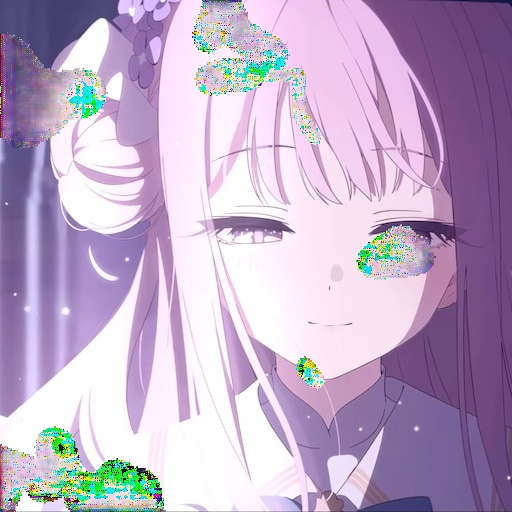

In [19]:
output_img = cv2.imread('./Image-Inpainting-for-Anime-Digital-Painting/result/refinement_output0.jpg')
cv2_imshow(output_img)

Groundtruth image

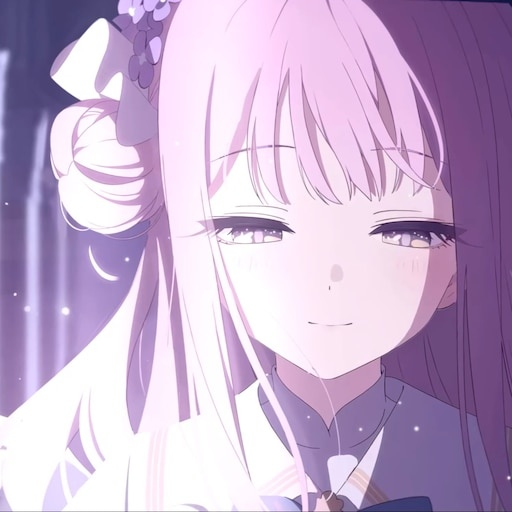

In [20]:
output_img = cv2.imread('./Image-Inpainting-for-Anime-Digital-Painting/result/groundtruth0.jpg')
cv2_imshow(output_img)